## **Perform sentimental analysis on the Elon-musk tweets**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import spacy

from nltk.corpus import stopwords

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import imread
%matplotlib inline

In [ ]:
elon = pd.read_csv('Elon_musk.csv', encoding="ISO-8859-1")
elon.drop(columns='Unnamed: 0' , inplace=True)
elon 

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
#No. of words in each tweet

elon['word_count'] = elon['Text'].apply(lambda x: len(str(x).split(' ')))
elon.head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [ ]:
elon['digits'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
elon.head()

,Text,word_count,digits
0,@kunalb11 Im an alien,4,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,0
2,@joerogan @Spotify Great interview!,4,0
3,@gtera27 Doge is underestimated,4,0
4,@teslacn Congratulations Tesla China for amazi...,17,0


In [ ]:
elon.digits.value_counts()

0     1854
1      117
2       23
3        3
4        1
10       1
Name: digits, dtype: int64

In [ ]:
elon['web_links'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('https://')]))
elon.head()

,Text,word_count,digits,web_links
0,@kunalb11 Im an alien,4,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,0,0
2,@joerogan @Spotify Great interview!,4,0,0
3,@gtera27 Doge is underestimated,4,0,0
4,@teslacn Congratulations Tesla China for amazi...,17,0,0


In [ ]:
elon.web_links.value_counts()

0    1356
1     632
2      11
Name: web_links, dtype: int64

In [ ]:
elon['hashtag'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
elon.head()

,Text,word_count,digits,web_links,hashtag
0,@kunalb11 Im an alien,4,0,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,0,0,0
2,@joerogan @Spotify Great interview!,4,0,0,0
3,@gtera27 Doge is underestimated,4,0,0,0
4,@teslacn Congratulations Tesla China for amazi...,17,0,0,0


In [ ]:
elon.hashtag.value_counts()

0    1990
1       5
2       3
4       1
Name: hashtag, dtype: int64

In [ ]:
elon = [Text.strip() for Text in elon.Text] # remove both the leading and the trailing characters 
elon = [Text for Text in elon if Text] # removes empty strings, because they are considered in Python as False
elon[0:5]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [ ]:
# Joining the list into one string/text
elon_text = ' '.join(elon)
elon_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

# **Extract reviews of any product from ecommerce website like amazon & Perform emotion mining**

In [ ]:
#importing necessary libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt #graphical representation
import seaborn as sns

import string # special operations on strings
import spacy # language models

from nltk.corpus import stopwords

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline 

import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [ ]:
headers = {'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',   
    
}

In [ ]:
def get_soup(url):
    r = requests.get(url, headers=headers,  params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [ ]:
#look for web-tags in our soup, then append our data to reviewList
# Initialize list to store reviews data later on

reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/Airdopes-121v2-Bluetooth-Immersive-Assistant/product-reviews/B08JQN8DGZ/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/999 [00:00<?, ?it/s]

In [ ]:
# Save results to a dataframe.. 
data = pd.DataFrame(reviewlist)
data.to_csv('Amzon_boat.csv', index=False)
data

,Rating,Title,Review,Review_Date
0,4.0,Great sound bad mic,Got it for 800 and the music quality is more t...,Reviewed in India 🇮🇳 on 23 November 2022
1,4.0,Good sound quality.,It has amazing design with stylish look. Sound...,Reviewed in India 🇮🇳 on 26 November 2022
2,4.0,It was excellent,It was a good product of boat company and ther...,Reviewed in India 🇮🇳 on 26 November 2022
3,4.0,Good headphones to buy in this budget,Good headphones to buy in this budget. Only th...,Reviewed in India 🇮🇳 on 26 November 2022
4,4.0,Best earpods,It's been 1.5 months bought this product and i...,Reviewed in India 🇮🇳 on 27 November 2022
...,...,...,...,...
4995,3.0,Not clear voice while talking over call.,While using mic of these..Other person can’t h...,Reviewed in India 🇮🇳 on 21 October 2021
4996,4.0,"Very useful to busy persons, students like me,...",The media could not be loaded.\n ...,Reviewed in India 🇮🇳 on 9 January 2021
4997,5.0,Very nyc product,Very good product,Reviewed in India 🇮🇳 on 8 July 2022
4998,4.0,Nice airpods on a decent price,Very good for listening but when it comes to c...,Reviewed in India 🇮🇳 on 9 June 2021


In [ ]:
data=pd.read_csv('Amzon_boat.csv')
data.head()

,Rating,Title,Review,Review_Date
0,4.0,Great sound bad mic,Got it for 800 and the music quality is more t...,Reviewed in India 🇮🇳 on 23 November 2022
1,4.0,Good sound quality.,It has amazing design with stylish look. Sound...,Reviewed in India 🇮🇳 on 26 November 2022
2,4.0,It was excellent,It was a good product of boat company and ther...,Reviewed in India 🇮🇳 on 26 November 2022
3,4.0,Good headphones to buy in this budget,Good headphones to buy in this budget. Only th...,Reviewed in India 🇮🇳 on 26 November 2022
4,4.0,Best earpods,It's been 1.5 months bought this product and i...,Reviewed in India 🇮🇳 on 27 November 2022


In [ ]:
# Removing 'Reviewed in India 🇮🇳 on '

Review_date=[0]

word_list = ['Reviewed', 'in', 'India', '🇮🇳' , 'on']
repl_wrd = ''

for i in range(0, len(data)):
    new_string = ' '.join([repl_wrd if idx in word_list else idx for idx in data.Review_Date[i].split()])
    Review_date.append(new_string)

data['Review_Date'] = Review_date[1:]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        5000 non-null   object 
 2   Review       4828 non-null   object 
 3   Review_Date  5000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 156.4+ KB


In [ ]:
data.Rating.describe()

count    5000.000000
mean        3.615800
std         1.200533
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [ ]:
data.Review.isna().sum()

172

In [ ]:
#for those entries where data.Review is null, replace Review with Title
data['Review'] = data['Review'].fillna(data['Title'])


#Stripping white spaces in Review_date
review_date = [0]

for i in range(0, len(data)):
    a= data.Review_Date[i].strip()
    review_date.append(a)

    
data['Review_Date']= review_date[1:]

**No. of words in each tweet**

In [ ]:
data ['word_count'] = data ['Review'].apply(lambda x: len(str(x).split(' ')))
data[['Rating', 'Review', 'word_count']] .head()

,Rating,Review,word_count
0,4.0,Got it for 800 and the music quality is more t...,101
1,4.0,It has amazing design with stylish look. Sound...,36
2,4.0,It was a good product of boat company and ther...,31
3,4.0,Good headphones to buy in this budget. Only th...,37
4,4.0,It's been 1.5 months bought this product and i...,15


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')
data['stopword_count']=data.Review.apply(lambda x: len([x for x in x.split() if x in stop])) 
data[['Rating', 'Review', 'word_count', 'stopword_count']].head()

,Rating,Review,word_count,stopword_count
0,4.0,Got it for 800 and the music quality is more t...,101,39
1,4.0,It has amazing design with stylish look. Sound...,36,12
2,4.0,It was a good product of boat company and ther...,31,15
3,4.0,Good headphones to buy in this budget. Only th...,37,15
4,4.0,It's been 1.5 months bought this product and i...,15,6


**No. of digits**

In [ ]:
data['digits'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits']].head()


,Rating,Review,word_count,stopword_count,digits
0,4.0,Got it for 800 and the music quality is more t...,101,39,4
1,4.0,It has amazing design with stylish look. Sound...,36,12,0
2,4.0,It was a good product of boat company and ther...,31,15,0
3,4.0,Good headphones to buy in this budget. Only th...,37,15,0
4,4.0,It's been 1.5 months bought this product and i...,15,6,0


**No. of URLs**

In [ ]:
data['web_links'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('https://')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links']].head()


,Rating,Review,word_count,stopword_count,digits,web_links
0,4.0,Got it for 800 and the music quality is more t...,101,39,4,0
1,4.0,It has amazing design with stylish look. Sound...,36,12,0,0
2,4.0,It was a good product of boat company and ther...,31,15,0,0
3,4.0,Good headphones to buy in this budget. Only th...,37,15,0,0
4,4.0,It's been 1.5 months bought this product and i...,15,6,0,0


In [ ]:
data.web_links.value_counts()
#no weblinks

0    5000
Name: web_links, dtype: int64

**No. of hashtags**

In [ ]:
data['hashtag'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links', 'hashtag']].head()


,Rating,Review,word_count,stopword_count,digits,web_links,hashtag
0,4.0,Got it for 800 and the music quality is more t...,101,39,4,0,0
1,4.0,It has amazing design with stylish look. Sound...,36,12,0,0,0
2,4.0,It was a good product of boat company and ther...,31,15,0,0,0
3,4.0,Good headphones to buy in this budget. Only th...,37,15,0,0,0
4,4.0,It's been 1.5 months bought this product and i...,15,6,0,0,0


In [ ]:
data.hashtag.value_counts()
# 4 hashtags

0    4997
1       3
Name: hashtag, dtype: int64

In [ ]:
data['date'] = data['Review_Date'].str.split(' ').str[0] 
data['Month'] = data['Review_Date'].str.split(' ').str[1] 
data['Year'] = data['Review_Date'].str.split(' ').str[2] 
data[['Review_Date', 'date', 'Month', 'Year']]

,Review_Date,date,Month,Year
0,23 November 2022,23,November,2022
1,26 November 2022,26,November,2022
2,26 November 2022,26,November,2022
3,26 November 2022,26,November,2022
4,27 November 2022,27,November,2022
...,...,...,...,...
4995,21 October 2021,21,October,2021
4996,9 January 2021,9,January,2021
4997,8 July 2022,8,July,2022
4998,9 June 2021,9,June,2021


In [ ]:
#keeping useful columns and droppping others for the moment
data1 = data[['Rating','Title','Review', 'date', 'Month', 'Year']]
data1

,Rating,Title,Review,date,Month,Year
0,4.0,Great sound bad mic,Got it for 800 and the music quality is more t...,23,November,2022
1,4.0,Good sound quality.,It has amazing design with stylish look. Sound...,26,November,2022
2,4.0,It was excellent,It was a good product of boat company and ther...,26,November,2022
3,4.0,Good headphones to buy in this budget,Good headphones to buy in this budget. Only th...,26,November,2022
4,4.0,Best earpods,It's been 1.5 months bought this product and i...,27,November,2022
...,...,...,...,...,...,...
4995,3.0,Not clear voice while talking over call.,While using mic of these..Other person can’t h...,21,October,2021
4996,4.0,"Very useful to busy persons, students like me,...",The media could not be loaded.\n ...,9,January,2021
4997,5.0,Very nyc product,Very good product,8,July,2022
4998,4.0,Nice airpods on a decent price,Very good for listening but when it comes to c...,9,June,2021


**Reviews by Year**

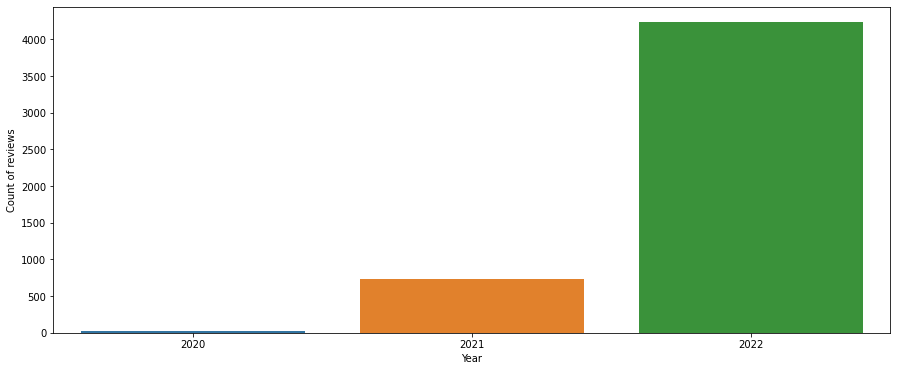

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.countplot(data1.Year, order=['2020','2021','2022'] ) 
plt.xlabel('Year')
plt.ylabel('Count of reviews')
plt.show()

Reviews by Month-Year

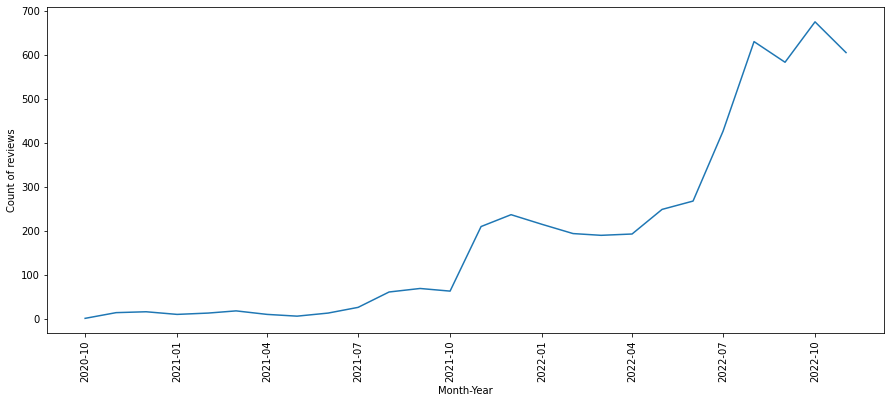

In [ ]:
data['Mo_Year'] = data['Month'] + ' ' + data['Year'] 
a = pd.DataFrame(data['Mo_Year'].value_counts() ) 
a = a.reset_index(level=0)
# convert to date
a['index'] = pd.to_datetime(a['index'])
a.sort_values(by='index').reset_index(drop=True) 

a = a.rename(columns={'index':'month_year', 'Mo_Year': 'review_count'}) 
plt.figure(figsize=(15,6))
sns.lineplot(x=a.month_year, y=a.review_count)
plt.xlabel('Month-Year')
plt.ylabel('Count of reviews')
plt.xticks(rotation = 90 )
plt.show() 

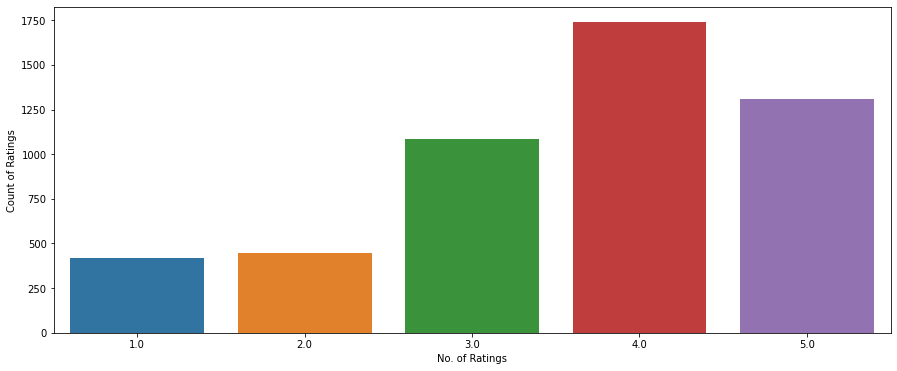

In [ ]:
#Reviews by Stars
plt.figure(figsize=(15,6))
sns.countplot(data1.Rating) 
plt.xlabel('No. of Ratings')
plt.ylabel('Count of Ratings')
plt.show()



In [ ]:
#Keeping features which are imp for time being
data2 = data1[['Review']] 
data2

,Review
0,Got it for 800 and the music quality is more t...
1,It has amazing design with stylish look. Sound...
2,It was a good product of boat company and ther...
3,Good headphones to buy in this budget. Only th...
4,It's been 1.5 months bought this product and i...
...,...
4995,While using mic of these..Other person can’t h...
4996,The media could not be loaded.\n ...
4997,Very good product
4998,Very good for listening but when it comes to c...


**Removing punctuations, digits, emogies and normalising reviews**

In [ ]:
import re 
corpus = []



for i in range(0, len(data2)):
    #review = re.sub('@[^\s]+' , '' , data2.Review[i]) #remove userid
    #review = re.sub(r'http\S+' , '', review ) #remove URL
    
    review = re.sub(r'[^\w\s]', '', data2.Review[i]) #remove punctuation
    review = review.lower() #normalise
    review = re.sub(r'\d', '', review) #remove digits
    
    corpus.append(review)

In [ ]:
corpus

['got it for  and the music quality is more than worth it has been working great for more than  months now surprisingly great battery life buds run upto  hours or more without charge and charge within  minutes the case can completely charge the buds  times the case takes  mins to charge completelymic quality is very poor though might just be a defect on my piece the things we say are feeble to the listener and the background noise is more prominent in the mic than our words yet again might just be my pieces defect',
 'it has amazing design with stylish look sound quality is very good  easy to connect thus easy to handle bass is of high quality we can see battery  alsooverall this product is good ',
 'it was a good product of boat company and there was clearlty of sound with bass and it also help full to make a call with the help of google assistant',
 'good headphones to buy in this budget only thing that i dont like is the micro usb port to charge the headphones these days type c port

In [ ]:
data2['clean_reviews'] = corpus 
data2


,Review,clean_reviews
0,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...
1,It has amazing design with stylish look. Sound...,it has amazing design with stylish look sound ...
2,It was a good product of boat company and ther...,it was a good product of boat company and ther...
3,Good headphones to buy in this budget. Only th...,good headphones to buy in this budget only thi...
4,It's been 1.5 months bought this product and i...,its been months bought this product and its o...
...,...,...
4995,While using mic of these..Other person can’t h...,while using mic of theseother person cant hear...
4996,The media could not be loaded.\n ...,the media could not be loaded\n ...
4997,Very good product,very good product
4998,Very good for listening but when it comes to c...,very good for listening but when it comes to c...


In [ ]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
user_stop_words = []

my_stop_words.extend(user_stop_words)

stopwords_set = set(my_stop_words)
clean_reviews = []

for i in range (0, len(data2)):
    
    words_without_stopwords = [word for word in data2.clean_reviews[i].split() if not word in my_stop_words]
    
    clean_reviews.append(' '.join(words_without_stopwords))
    
data2['absolute_clean_reviews'] = clean_reviews
data2.head(10)

,Review,clean_reviews,absolute_clean_reviews
0,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...,got music quality worth working great months s...
1,It has amazing design with stylish look. Sound...,it has amazing design with stylish look sound ...,amazing design stylish look sound quality good...
2,It was a good product of boat company and ther...,it was a good product of boat company and ther...,good product boat company clearlty sound bass ...
3,Good headphones to buy in this budget. Only th...,good headphones to buy in this budget only thi...,good headphones buy budget thing dont like mic...
4,It's been 1.5 months bought this product and i...,its been months bought this product and its o...,months bought product one best boat earpod
5,The product is goodBut the left side bud is no...,the product is goodbut the left side bud is no...,product goodbut left side bud workingi brought...
6,"Sounds quality is good, so good for listening ...",sounds quality is good so good for listening m...,sounds quality good good listening music usefu...
7,Noises cancellation and the open and close of ...,noises cancellation and the open and close of ...,noises cancellation open close box loose
8,"Good product.Good battery, good sound quality....",good productgood battery good sound qualitybut...,good productgood battery good sound qualitybut...
9,"Woah!! A really good one in this price, as I h...",woah a really good one in this price as i have...,woah really good one price used heaphonesearpo...


In [ ]:
#Tokenisation
tokenized_review = data2['absolute_clean_reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [got, music, quality, worth, working, great, m...
1    [amazing, design, stylish, look, sound, qualit...
2    [good, product, boat, company, clearlty, sound...
3    [good, headphones, buy, budget, thing, dont, l...
4    [months, bought, product, one, best, boat, ear...
5    [product, goodbut, left, side, bud, workingi, ...
6    [sounds, quality, good, good, listening, music...
7      [noises, cancellation, open, close, box, loose]
8    [good, productgood, battery, good, sound, qual...
9    [woah, really, good, one, price, used, heaphon...
Name: absolute_clean_reviews, dtype: object

In [ ]:
#lemmatisation
import nltk
nltk.download('omw-1.4') 
nltk.download('wordnet')  

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

word_lemmatizer = WordNetLemmatizer()

tokenized_review = tokenized_review.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_review.head(10)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


0    [got, music, quality, worth, working, great, m...
1    [amazing, design, stylish, look, sound, qualit...
2    [good, product, boat, company, clearlty, sound...
3    [good, headphone, buy, budget, thing, dont, li...
4    [month, bought, product, one, best, boat, earpod]
5    [product, goodbut, left, side, bud, workingi, ...
6    [sound, quality, good, good, listening, music,...
7       [noise, cancellation, open, close, box, loose]
8    [good, productgood, battery, good, sound, qual...
9    [woah, really, good, one, price, used, heaphon...
Name: absolute_clean_reviews, dtype: object

In [ ]:
#joining tokens into sentence
for i, tokens in enumerate(tokenized_review):
    tokenized_review[i] = ' '.join(tokens)

data2['absolute_clean_reviews'] = tokenized_review
data2.head(10)

,Review,clean_reviews,absolute_clean_reviews
0,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...,got music quality worth working great month su...
1,It has amazing design with stylish look. Sound...,it has amazing design with stylish look sound ...,amazing design stylish look sound quality good...
2,It was a good product of boat company and ther...,it was a good product of boat company and ther...,good product boat company clearlty sound bass ...
3,Good headphones to buy in this budget. Only th...,good headphones to buy in this budget only thi...,good headphone buy budget thing dont like micr...
4,It's been 1.5 months bought this product and i...,its been months bought this product and its o...,month bought product one best boat earpod
5,The product is goodBut the left side bud is no...,the product is goodbut the left side bud is no...,product goodbut left side bud workingi brought...
6,"Sounds quality is good, so good for listening ...",sounds quality is good so good for listening m...,sound quality good good listening music useful...
7,Noises cancellation and the open and close of ...,noises cancellation and the open and close of ...,noise cancellation open close box loose
8,"Good product.Good battery, good sound quality....",good productgood battery good sound qualitybut...,good productgood battery good sound qualitybut...
9,"Woah!! A really good one in this price, as I h...",woah a really good one in this price as i have...,woah really good one price used heaphonesearpo...


**Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(data2.absolute_clean_reviews)  
print(vectorizer.vocabulary_)


{'got': 2140, 'music': 3205, 'quality': 3971, 'worth': 5512, 'working': 5476, 'great': 2148, 'month': 3140, 'surprisingly': 4825, 'battery': 467, 'life': 2799, 'bud': 689, 'run': 4318, 'upto': 5194, 'hour': 2341, 'without': 5455, 'charge': 908, 'within': 5454, 'minute': 3091, 'case': 849, 'completely': 1088, 'time': 5006, 'take': 4855, 'min': 3081, 'completelymic': 1089, 'poor': 3709, 'though': 4985, 'might': 3069, 'defect': 1308, 'piece': 3641, 'thing': 4955, 'say': 4373, 'feeble': 1845, 'listener': 2832, 'background': 390, 'noise': 3290, 'prominent': 3899, 'mic': 3054, 'word': 5471, 'yet': 5556, 'amazing': 191, 'design': 1348, 'stylish': 4753, 'look': 2871, 'sound': 4629, 'good': 2077, 'easy': 1627, 'connect': 1116, 'thus': 4995, 'handle': 2214, 'bass': 446, 'high': 2294, 'see': 4413, 'alsooverall': 178, 'product': 3836, 'boat': 607, 'company': 1063, 'clearlty': 995, 'also': 176, 'help': 2282, 'full': 1980, 'make': 2943, 'call': 752, 'google': 2138, 'assistant': 298, 'headphone': 225

In [ ]:
vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,3), min_df=3) 
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

count_df = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df

,aa,aage,aap,aati,aavaj,ab,able,able connect,able hear,able hear clearly,...,बहत,बहत अचछ,मझ,रह,लए,वल,सउड,सकत,सह,हत
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

count_df_tf_idf = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df_tf_idf

,aa,aage,aap,aati,aavaj,ab,able,able connect,able hear,able hear clearly,...,रह,लए,वल,सउड,सकत,सफ,सफ नह,सह,सह नह,हत
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data2

,Review,clean_reviews,absolute_clean_reviews
0,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...,got music quality worth working great month su...
1,It has amazing design with stylish look. Sound...,it has amazing design with stylish look sound ...,amazing design stylish look sound quality good...
2,It was a good product of boat company and ther...,it was a good product of boat company and ther...,good product boat company clearlty sound bass ...
3,Good headphones to buy in this budget. Only th...,good headphones to buy in this budget only thi...,good headphone buy budget thing dont like micr...
4,It's been 1.5 months bought this product and i...,its been months bought this product and its o...,month bought product one best boat earpod
...,...,...,...
4995,While using mic of these..Other person can’t h...,while using mic of theseother person cant hear...,using mic theseother person cant hear clearly ...
4996,The media could not be loaded.\n ...,the media could not be loaded\n ...,medium could loaded product good first day usa...
4997,Very good product,very good product,good product
4998,Very good for listening but when it comes to c...,very good for listening but when it comes to c...,good listening come calling good prefer many n...


# **Sentiment Analysis**

In [ ]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1') 
affinity_scores = afinn.set_index('word')['value'].to_dict()
sent = []
a = 0 
for i in range(0,len(data2)):
    
    for j in range(0,len(data2.absolute_clean_reviews[i].split() )):
        
        word = data2.absolute_clean_reviews[i].split()[j]
        if  word in affinity_scores:
            a = a + affinity_scores[word]
    sent.append(a) 
    a = 0   
data2['sentiment_value'] = sent 
data2[['absolute_clean_reviews', 'sentiment_value']]

,absolute_clean_reviews,sentiment_value
0,got music quality worth working great month su...,0
1,amazing design stylish look sound quality good...,12
2,good product boat company clearlty sound bass ...,7
3,good headphone buy budget thing dont like micr...,5
4,month bought product one best boat earpod,3
...,...,...
4995,using mic theseother person cant hear clearly ...,2
4996,medium could loaded product good first day usa...,5
4997,good product,3
4998,good listening come calling good prefer many n...,6


In [ ]:
data2['sentiment'] = data2['sentiment_value'].apply(lambda c: 'Positive' if c >0 else ('Negative' if c<=-1  else 'Neutral'))
data2[['absolute_clean_reviews','sentiment_value','sentiment']]

,absolute_clean_reviews,sentiment_value,sentiment
0,got music quality worth working great month su...,0,Neutral
1,amazing design stylish look sound quality good...,12,Positive
2,good product boat company clearlty sound bass ...,7,Positive
3,good headphone buy budget thing dont like micr...,5,Positive
4,month bought product one best boat earpod,3,Positive
...,...,...,...
4995,using mic theseother person cant hear clearly ...,2,Positive
4996,medium could loaded product good first day usa...,5,Positive
4997,good product,3,Positive
4998,good listening come calling good prefer many n...,6,Positive


In [ ]:
data2.sentiment.value_counts()

Positive    3297
Neutral     1053
Negative     650
Name: sentiment, dtype: int64

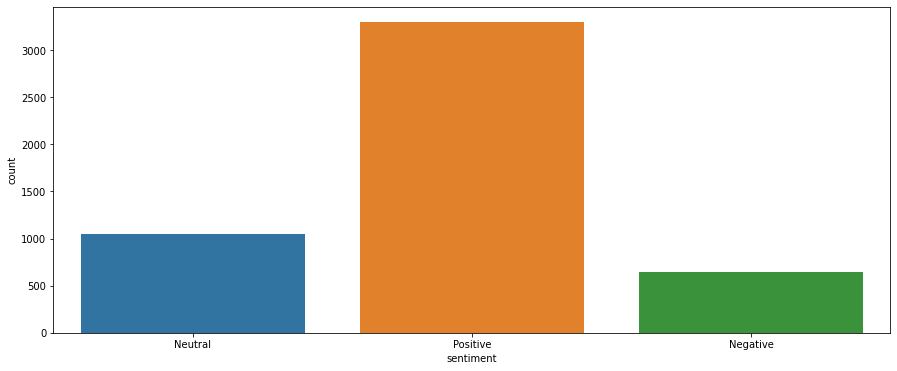

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data2.sentiment)

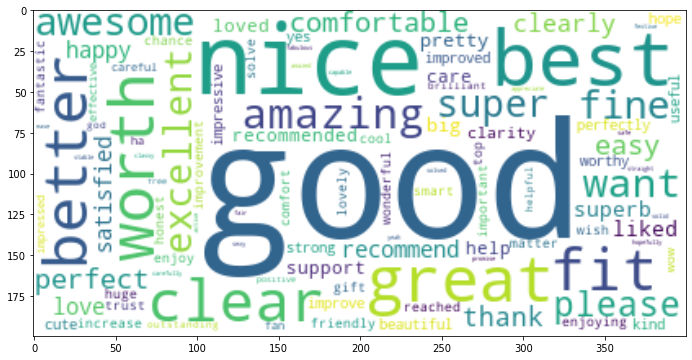

In [ ]:
positive = []
negative = []
neutral = [] 
for i in range(0,len(data2)):
    
    for j in range(0,len(data2.absolute_clean_reviews[i].split() )):
        
        word = data2.absolute_clean_reviews[i].split()[j]
        if  word in affinity_scores:
            a = affinity_scores[word]
            if a > 0: 
                positive.append(word)
            elif a < 0:
                negative.append(word)
            else :
                neutral.append(word)
  
pos =' '.join(positive) 
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(pos)
plt.imshow(word_cloud, interpolation='bilinear')


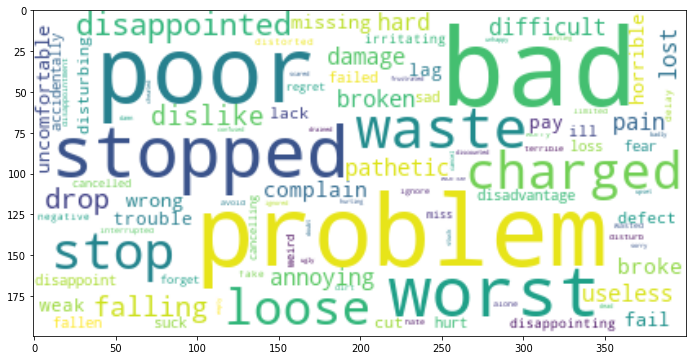

In [ ]:
neg = ' '.join(negative) 
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(neg)
plt.imshow(word_cloud, interpolation='bilinear')

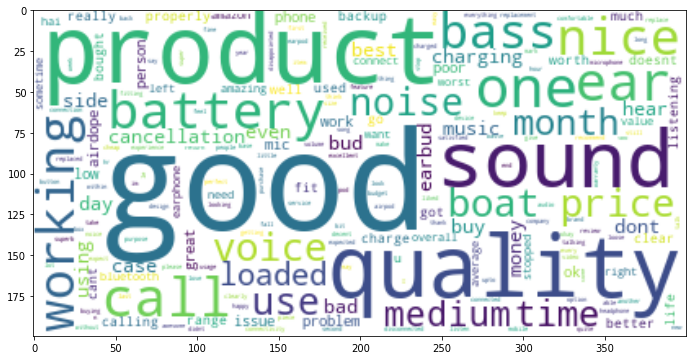

In [ ]:
absolute_clean_reviews_string=' '.join(data2.absolute_clean_reviews)
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(absolute_clean_reviews_string)
plt.imshow(word_cloud, interpolation='bilinear')